In [1]:
import sympy as sp
from sympy.plotting import plot
%matplotlib inline 

sp.init_printing()

# Лабораторна робота №1

<img src="http://civil.engr.siu.edu/cheval/engr351/Images/ENGR351.jpg" width="500px" height="300px" \>


### Умова задачі

Задано функцію $f(x)$, потрібно знайти корінь цієї функції, тобто хоча б одне значення параметру $x=x_0$, при якому $f(x_0)=0$. Якщо такого значення не існує повернути $null$.

Розглянемо три різні методи розвязку даної задачі:

 1. Метод дихотомії
 2. Метод Нютона
 3. Метод простої ітерації
 
Кожен з цих методів має свої недоліки і переваги, тому немає однозначно найкращого методу для розвязання цїєї задачі.

Для початку введемо декілька загальнопринятих позначень: $\epsilon$ та $x$ як символи бібліотеки SymPy

In [54]:
EPS = sp.Rational("1e-3")
x = sp.Symbol("x")

Визначимо функцію $fun$, для якої ми збираємося шукати корінь

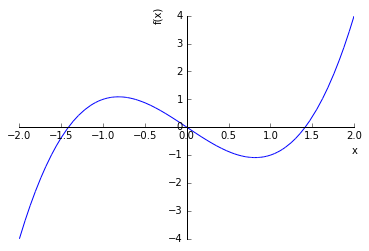

In [53]:
fun = x * x * x - 2 * x
plot(fun, (x, -2, 2))

Та її похідну $der$, що необхідна для коректної роботи деяких методів

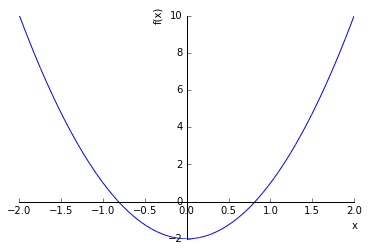

In [55]:
der = sp.diff(fun, x)
plot(der, (x, -2, 2))

### Метод дихотомії

Метод полягає у зменшені відрузку що розглядається вдвічі на кожній ітерації. **Необхідна умова** для застосування цього метода $f(a) \cdot f(b) <= 0$

#### Алгоритм

Покладемо $l = a, r = b$, тоді виконується інваріант $f(l) \cdot f(r) <=0$. Покажемо що він зберігається на кожній ітерації.

На кожній ітерації циклу вибирається точка $m = \large\frac{l + r}{2}$, і перевіряється умова $f(a) \cdot f(m) <= 0$.
Якщо вона виконується, тоді корінь знаходиться на проміжку $[a; m]$, інакше корінь треба шукати на проміжку $[m; b]$.

Рекурсивно виконуємо функцію пошуку для одного з вище вказаних проміжків.

In [51]:
def dih(a, b, f=fun, eps=EPS):
    print("[{}; {}]".format(a, b))
    
    if f.subs(x, a) * f.subs(x, b) > 0:
        return None
    
    if a > b:
        a, b = b, a
    
    if (b - a).evalf() <= EPS / sp.Integer(2):
        return a
    
    m = a + (b - a) / sp.Integer(2)
    if f.subs(x, a) * f.subs(x, m) <= 0:
        return dih(a, m, f, eps)
    else:
        return dih(m, b, f, eps)

In [52]:
res = dih(a=-5, b=sp.Rational('-0.1'))
"Result {}".format(sp.N(res))

[-5; -1/10]
[-51/20; -1/10]
[-51/20; -53/40]
[-31/16; -53/40]
[-261/160; -53/40]
[-473/320; -53/40]
[-473/320; -897/640]
[-1843/1280; -897/640]
[-3637/2560; -897/640]
[-3637/2560; -1445/1024]
[-14499/10240; -1445/1024]


'Result -1.41591796875000'

### Метод Нютона

Метод полягає в 

In [61]:
def newton(x0, f=fun, d=der, eps=EPS):
    x1 = x0 - f.subs(x, x0) / d.subs(x, x0)
    print(x1)
    while sp.Abs(x1 - x0).evalf() > EPS / sp.Integer(2):
        x0, x1 = x1, x1 - f.subs(x, x1) / d.subs(x, x1)
        print(x1)
    return x1

In [62]:
res = newton(x0=sp.Rational("0.7"))
"Result {}".format(sp.N(res, 10))

-343/265
-80707214/56311705
-525698898908274241116344/371627603054690733305645
-145281796700165482406124064134715758902336796547627308146353756741635584/102729732996097458209802593678671686897169995870305234692755699698238955


'Result -1.414213709'

### Метод простої ітерації

In [63]:
alpha = sp.Symbol("alpha")
h = x - fun * alpha
h

In [69]:
def simple(x0, alpha, f=fun, eps=EPS):
    h = x - alpha * f
    x1 = h.subs(x, x0)
    print("[{}; {}]".format(x0, x1))
    while abs(x1 - x0) > EPS / sp.Integer(2):
        x0, x1 = x1, h.subs(x, x1)
        print("[{}; {}]".format(x0, x1))
    return x1

In [72]:
res = simple(x0=-3, alpha=1/10)
"Result {}".format(sp.N(res, 10))

[-3; -0.899999999999999]
[-0.899999999999999; -1.00710000000000]
[-1.00710000000000; -1.10637484120890]
[-1.10637484120890; -1.19222230544724]
[-1.19222230544724; -1.26120500032101]
[-1.26120500032101; -1.31283393379161]
[-1.31283393379161; -1.34912946788598]
[-1.34912946788598; -1.37339351804289]
[-1.37339351804289; -1.38902139647760]
[-1.38902139647760; -1.39883060448028]
[-1.39883060448028; -1.40488375575778]
[-1.40488375575778; -1.40857882942595]
[-1.40857882942595; -1.41081927001965]
[-1.41081927001965; -1.41217210283174]
[-1.41217210283174; -1.41298691935436]
[-1.41298691935436; -1.41347693837618]


'Result -1.413476938'